In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('data/art_data.csv')
df = df[df['FORM'] == 'painting']
df = df.reset_index(drop=True)
df.head()

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME
0,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Venus and Adonis,1574-88,"Oil on canvas, 68 x 95 cm","Fogg Art Museum, Harvard University, Cambridge",https://www.wga.hu/html/a/aachen/adonis.html,painting,mythological,German,1601-1650
1,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",https://www.wga.hu/html/a/aachen/allegory.html,painting,mythological,German,1601-1650
2,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Allegory of Peace, Art and Abundance",1602,"Oil on canvas, 197 x 142 cm","The Hermitage, St. Petersburg",https://www.wga.hu/html/a/aachen/allegorz.html,painting,mythological,German,1601-1650
3,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Jupiter, Antiope and Cupid",1595-98,"Oil on copper, 31 x 21 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/html/a/aachen/antiope.html,painting,mythological,German,1601-1650
4,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Pallas Athena, Venus and Juno",1593,"Oil on canvas, 54 x 67 cm","Museum of Fine Arts, Boston",https://www.wga.hu/html/a/aachen/athena.html,painting,mythological,German,1601-1650


In [ ]:
"""
DataFrame shape (rows, columns): (28459, 13)

Columns and data types:
 AUTHOR              object
BORN-DIED           object
TITLE               object
DATE                object
TECHNIQUE           object
LOCATION            object
URL                 object
FORM                object
TYPE                object
SCHOOL              object
TIMEFRAME           object
DATE_NORMALIZED    float64
CENTURY              int64

"""


In [3]:
dates_with_period = df[df['DATE'].astype(str).str.contains('\.')]['DATE']
for item in dates_with_period:
    print(item)


c. 1596
c. 1490
c. 1552
c. 1560
c. 1570
c. 1555
c. 1560
c. 1560
c. 1860
c. 1650
c. 1794
c. 1650
c. 1665
c. 1665
c. 1660
c. 1645
c. 1650
c. 1550
c. 1560
c. 1560
c. 1560
c. 1803
c. 1730
c. 1617
c. 1610
c. 1610
c. 1416
c. 1512
c. 1745
c. 1745
c. 1795
c. 1839
c. 1600
c. 1580
c. 1558
c. 1570
c. 1608
c. 1620
c. 1616
c. 1518
c. 1530
c. 1513
c. 1512
c. 1512
c. 1520
c. 1520
c. 1520
c. 1520
c. 1526
c. 1522
c. 1518
c. 1516
c. 1516
c. 1530
c. 1530
c. 1370
c. 1737
c. 1552
c. 1837
c. 1835
c. 1739
c. 1740
c. 1740
c. 1739
c. 1739
c. 1730
c. 1800
c. 1825
c. 1478
c. 1478
c. 1478
c. 1445
c. 1450
c. 1450
c. 1450
c. 1450
c. 1450
c. 1450
c. 1450
c. 1450
c. 1450
c. 1450
c. 1450
c. 1450
c. 1450
c. 1450
c. 1453
c. 1453
c. 1455
c. 1455
c. 1518
c. 1517
c. 1517
c. 1520
c. 1520
c. 1520
c. 1520
c. 1520
c. 1523
c. 1523
c. 1529
c.1529
c. 1528
c. 1528
c. 1528
c. 1528
c. 1528
c. 1528
c. 1880
c. 1650
c. 1754
c. 1754
c. 1754
c. 1425
c. 1433
c. 1433
c. 1433
c. 1433
c. 1433
c. 1433
c. 1433
c. 1433
c. 1433
c. 1431
c. 1431
c

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/4v/hcqt1p7s1859vr42874pyy8r0000gn/T/ipykernel_85388/2570033165.py:2: SyntaxWarning: invalid escape sequence '\.'
  dates_with_period = df[df['DATE'].astype(str).str.contains('\.')]['DATE']


In [4]:
def normalize_date(date_str):
    try:
        date_str = date_str.strip().lower()
        
        if not date_str or date_str == '-':
            return None
        match_4 = re.search(r'\d{4}', date_str)
        match_3 = re.search(r'\d{3}', date_str)

        if match_4:
            return int(match_4.group(0))
        elif match_3:
            return int(match_3.group(0))
        else:
            print(f'no match no error: {date_str}')
            return None
    except ValueError:
        print(f"Value causing issue: '{date_str}'")
        return None

In [5]:
df['DATE_NORMALIZED'] = df['DATE'].apply(normalize_date)
# df.reset_index(drop=True)

no match no error: 5th century
no match no error: 5th century
no match no error: 4th century
no match no error: 6th century
no match no error: 6th century
no match no error: 6th century
no match no error: 6th century
no match no error: 8th century
no match no error: 8th century
no match no error: 2nd century
no match no error: 3rd century
no match no error: 4th century
no match no error: 4th century
no match no error: late 3rd century
no match no error: 2nd century
no match no error: 2nd century
no match no error: 2nd century
no match no error: 2nd century
no match no error: 2nd century
no match no error: 2nd century
no match no error: 2nd century
no match no error: 3rd century
no match no error: 3rd century
no match no error: 4th century
no match no error: 3rd century
no match no error: 2nd century
no match no error: 2nd century
no match no error: 2nd century
no match no error: 2nd century
no match no error: 3rd century
no match no error: 3rd century
no match no error: 3rd century
no 

In [6]:
nan_dates = df[df['DATE_NORMALIZED'].isna()]
print(nan_dates['DATE_NORMALIZED'])
# df['DATE_NORMALIZED'].value_counts()

91      NaN
98      NaN
104     NaN
123     NaN
124     NaN
         ..
32411   NaN
32420   NaN
32424   NaN
32426   NaN
32430   NaN
Name: DATE_NORMALIZED, Length: 3977, dtype: float64


In [7]:
df = df.dropna(subset=['DATE_NORMALIZED'])
df.reset_index(drop=True)

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME,DATE_NORMALIZED
0,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Venus and Adonis,1574-88,"Oil on canvas, 68 x 95 cm","Fogg Art Museum, Harvard University, Cambridge",https://www.wga.hu/html/a/aachen/adonis.html,painting,mythological,German,1601-1650,1574.0
1,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",https://www.wga.hu/html/a/aachen/allegory.html,painting,mythological,German,1601-1650,1598.0
2,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Allegory of Peace, Art and Abundance",1602,"Oil on canvas, 197 x 142 cm","The Hermitage, St. Petersburg",https://www.wga.hu/html/a/aachen/allegorz.html,painting,mythological,German,1601-1650,1602.0
3,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Jupiter, Antiope and Cupid",1595-98,"Oil on copper, 31 x 21 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/html/a/aachen/antiope.html,painting,mythological,German,1601-1650,1595.0
4,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Pallas Athena, Venus and Juno",1593,"Oil on canvas, 54 x 67 cm","Museum of Fine Arts, Boston",https://www.wga.hu/html/a/aachen/athena.html,painting,mythological,German,1601-1650,1593.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28454,"ZURBARÁN, Francisco de","(b. 1598, Fuente de Cantos, d. 1664, Madrid)",The Holy Face,c. 1660,"Oil on canvas, 104 x 85 cm","Museo de Bellas Artes, Bilbao",https://www.wga.hu/html/z/zurbaran/2/veronica....,painting,religious,Spanish,1601-1650,1660.0
28455,"ZURBARÁN, Francisco de","(b. 1598, Fuente de Cantos, d. 1664, Madrid)",Virgin and Child with the Infant St John the B...,1662,"Oil on canvas, 169 x 127 cm","Museo de Bellas Artes, Bilbao",https://www.wga.hu/html/z/zurbaran/2/virgin.html,painting,religious,Spanish,1601-1650,1662.0
28456,"ZURBARÁN, Francisco de","(b. 1598, Fuente de Cantos, d. 1664, Madrid)","The Virgin Mary as a Child, Asleep",c. 1655,"Oil on canvas, 103 x 90 cm",Private collection,https://www.wga.hu/html/z/zurbaran/2/virginas....,painting,religious,Spanish,1601-1650,1655.0
28457,"ZURBARÁN, Francisco de","(b. 1598, Fuente de Cantos, d. 1664, Madrid)",Childhood of the Virgin,1658-60,"Oil on canvas, 74 x 54 cm","The Hermitage, St. Petersburg",https://www.wga.hu/html/z/zurbaran/2/virginch....,painting,religious,Spanish,1601-1650,1658.0


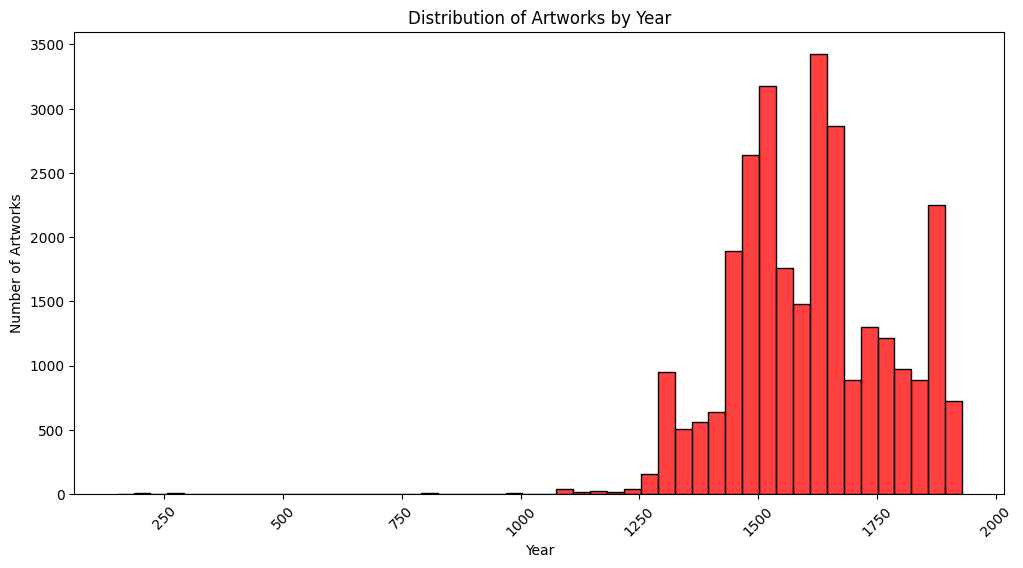

In [8]:
# Distribution of the years (Title Date)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='DATE_NORMALIZED', bins=50, kde=False, color='red', edgecolor='black')
plt.title('Distribution of Artworks by Year')
plt.xlabel('Year')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45)
plt.show()


In [9]:

df['CENTURY'] = ((df['DATE_NORMALIZED'] // 100) + 1).astype(int)

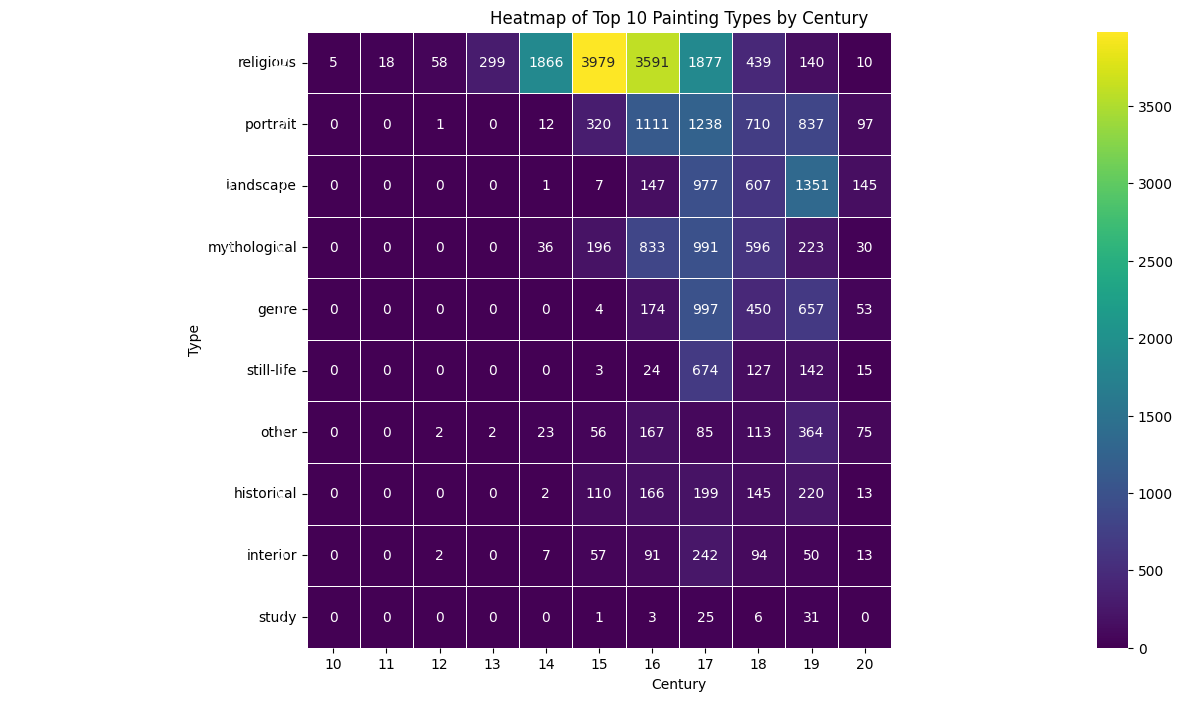

In [10]:
# Heatmap of Top 10 Painting Types by Century
pivot_table = df.pivot_table(index='TYPE', columns='CENTURY', aggfunc='size', fill_value=0)
type_sums = pivot_table.sum(axis=1)
top_styles = type_sums.sort_values(ascending=False).head(10)
top_pivot_table = pivot_table.loc[top_styles.index]

plt.figure(figsize=(12, 8))
sns.heatmap(top_pivot_table, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.title('Heatmap of Top 10 Painting Types by Century')
plt.xlim(6,20)
plt.xlabel('Century')
plt.ylabel('Type')
plt.show()

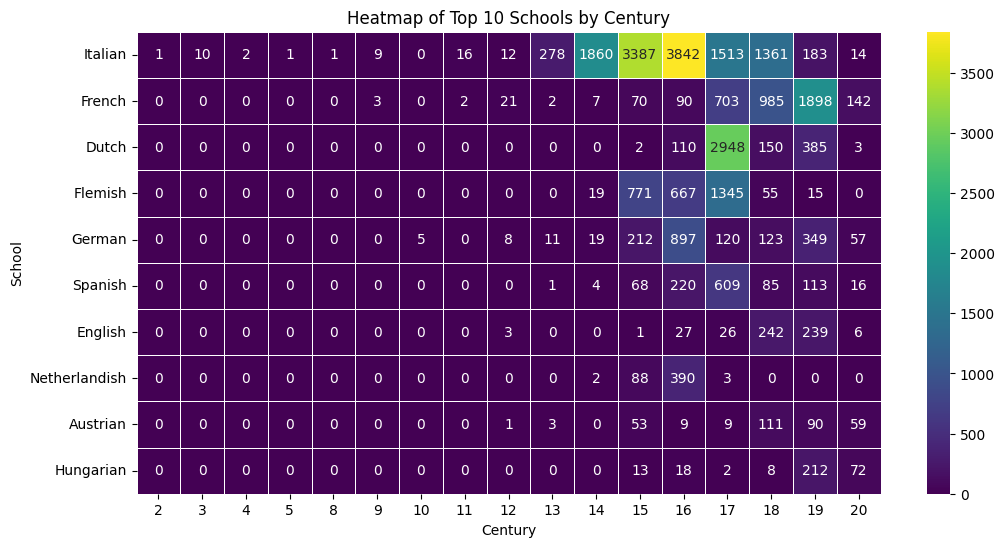

In [11]:
# Top 10 Schools by Century
pivot_table = df.pivot_table(index='SCHOOL', columns='CENTURY', aggfunc='size', fill_value=0)
nationality_sums = pivot_table.sum(axis=1)
top_styles = nationality_sums.sort_values(ascending=False).head(10)
top_pivot_table = pivot_table.loc[top_styles.index]

plt.figure(figsize=(12, 6))
sns.heatmap(top_pivot_table, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.title('Heatmap of Top 10 Schools by Century')
plt.xlabel('Century')
plt.ylabel('School')
plt.show()

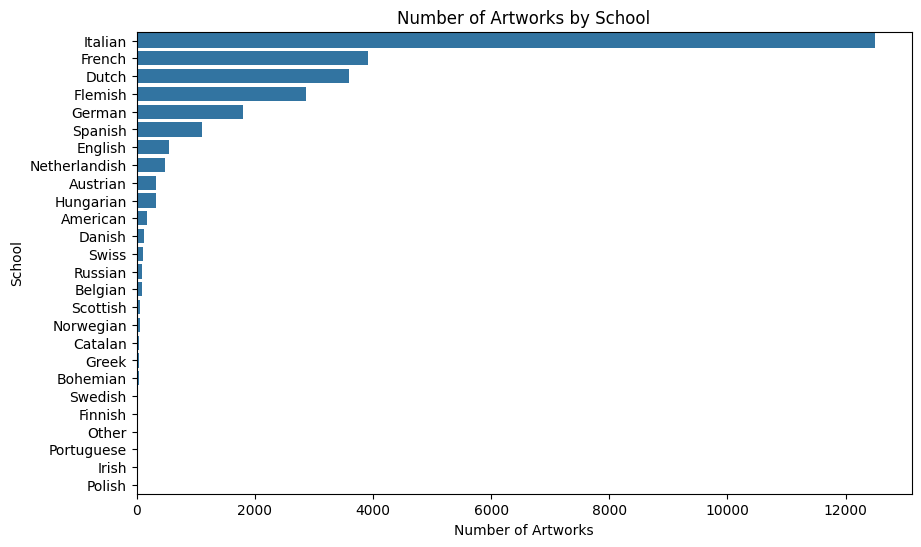

In [12]:
# # of Artworks by School
plt.figure(figsize=(10, 6))
sns.countplot(y='SCHOOL', data=df, order=df['SCHOOL'].value_counts().index)
plt.title('Number of Artworks by School')
plt.xlabel('Number of Artworks')
plt.ylabel('School')
plt.show()

In [13]:
df['TYPE'].value_counts()

TYPE
religious       12307
portrait         4326
landscape        3235
mythological     2905
genre            2335
still-life        985
other             889
historical        855
interior          556
study              66
Name: count, dtype: int64

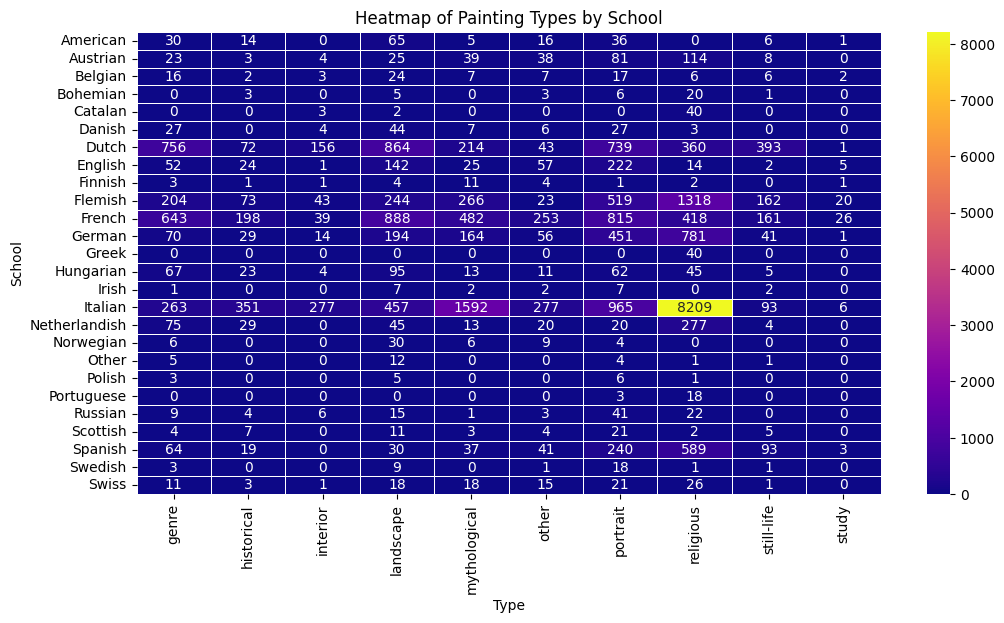

In [18]:
pivot_table = df.pivot_table(index='SCHOOL', columns='TYPE', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='plasma', linewidths=.5)
# sns.heatmap(pivot_table, cmap="plasma")
plt.title('Heatmap of Painting Types by School')
plt.xlabel('Type')
plt.ylabel('School')
plt.show()

In [15]:
df['TYPE'].value_counts()

TYPE
religious       12307
portrait         4326
landscape        3235
mythological     2905
genre            2335
still-life        985
other             889
historical        855
interior          556
study              66
Name: count, dtype: int64

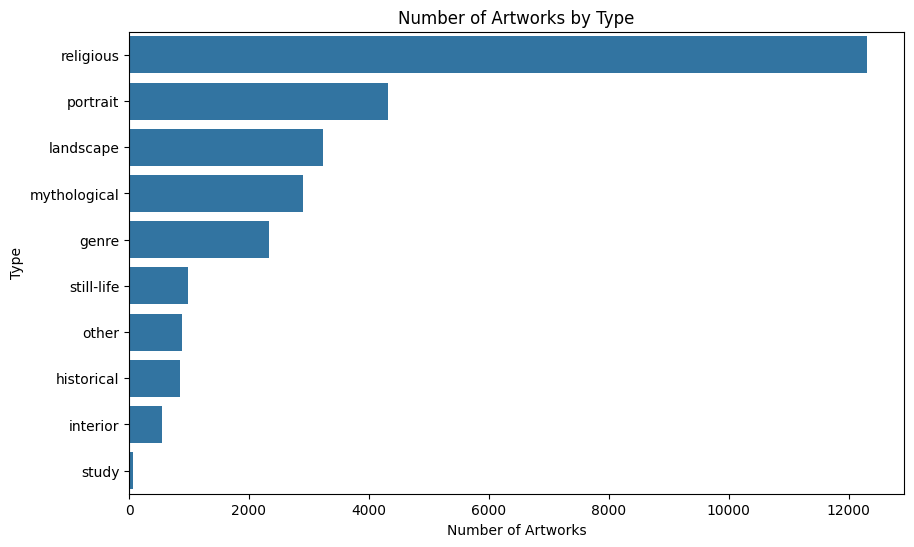

In [16]:
# Type of artworks 
plt.figure(figsize=(10, 6))
sns.countplot(y='TYPE', data=df, order=df['TYPE'].value_counts().index)
plt.title('Number of Artworks by Type')
plt.xlabel('Number of Artworks')
plt.ylabel('Type')
plt.show()

data/portraits/15th_Century_Flemish